**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Imraan Arbab
- Huu Pham
- Wilson Sugiarto
- Jude Dimes
- Yashas Chandrasekharan

# Research Question

To what extent do parental education levels impact a student's performance in math and reading, and how does the influence differ between the mother’s and father’s education levels?

## Background and Prior Work

Research has long shown that a parent's education level can impact a child’s academic success, especially in subjects like math and language skills. Studies indicate that parents’ educational backgrounds often reflect their socioeconomic status, which in turn shapes their children’s access to educational opportunities. 
A study by Li and Qiu (2018) in China found that family background influences children’s academic achievements. Parents with higher education levels are generally part of higher socioeconomic backgrounds, which provides access to better resources. As a result, their children benefit from these opportunities, often leading to better academic performance. For example, students in urban areas, who tend to come from higher socioeconomic backgrounds, often outperform students in rural areas, highlighting a link between socioeconomic status and educational access.
Another study by Alibrahim and Taifour (2023) in Bahrain looked at how a mother’s education impacts primary school students’ performance. This study found that most mothers held either a secondary diploma (42%) or a university degree (34%), but this variation in education level did not directly correlate with the students' GPAs. Instead, the study noted that 76% of students relied on their mothers for school support, showing that a mother’s involvement and support were more influential than her educational background alone. This suggests that while a parent's level of education can help provide resources, the time and attention a parent gives can play an even bigger role in a child’s learning and academic success.
Together, these studies highlight that both the resources parents provide and the time they invest in their children’s education are essential. In our project, we will build on this research to explore the distinct roles of both mothers' and fathers' education levels in children’s academic performance, particularly in math and language skills. Our goal is to better understand how different types of parental involvement impact learning, which may help inform strategies for parental engagement to support student success. 


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Li, Zhonglu, and Zeqi Qiu. “How Does Family Background Affect Children’s Educational Achievement? Evidence From Contemporary China.” The Journal of Chinese Sociology 5, no. 1 (October 2, 2018). https://doi.org/10.1186/s40711-018-0083-8. 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Alibraheim, Essa, and Enas Taifour. “The Relationship Between Mothers’ Educational Levels and Their Children’s Academic Performance.” Pegem Journal of Education and Instruction 13, no. 3 (January 1, 2023). https://doi.org/10.47750/pegegog.13.03.04. 



# Hypothesis


There are two parts to our hypothesis:

1. Overall Impact of Parental Education: We hypothesize that higher parental education levels are associated with better student performance in math and reading, as parents with more education are more likely to provide academic support and encouragement.

2. Comparative Impact of Mother’s vs. Father’s Education: We predict that the mother’s education level will have a slightly greater impact on a student’s performance in these subjects, due to potential differences in parental involvement and support.

# Data

Dataset #1:

Dataset Name: Math course

Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/student-performance/data?select=Maths.csv

Number of observations: 398

Number of variables: 33

Dataset #2

Dataset Name: Portuguese Language course

Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/student-performance/data?select=Portuguese.csv

Number of observations: 652

Number of variables: 33

Both datasets, Maths.csv and Portuguese.csv, contain many points of information about each student. Some of the important ones include the basic informative variables like age, gender, school, parental education, etc, but also includes broader information like family size, parental cohabitation status, educational support statuses. Most of these variables are organized binarily, with LE3 (less than 3 members) and GT3 (greater than 3 members) as an example for family size. The datasets also include support variables that are either measured in numeric intervals, like weekly study time or quality of family relationships, binary variables like extracurricular involvement or internet access, and nominal variables like a student’s guardian or parental occupation. For the purposes of data wrangling, we will go through the process of addressing any missing or inconsistent data by filling or correcting these values based on the context. Binary variables like 'schoolsup' and 'famsup' will be converted from 'yes'/'no' to numeric binary format (0 or 1) for analytical consistency. Outliers will be identified using statistical thresholds and treated accordingly to minimize their impact on analyses. Duplicate entries will be removed to ensure data integrity. When combining multiple datasets, we will align the columns to ensure consistency in data types and structures. The datasets will be merged based on student identifiers or aligned based on their indexes if direct identifiers are absent.


## Math Scores Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group043-FA24/refs/heads/master/Maths.csv?token=GHSAT0AAAAAACUICTULV46AJXZ3R5MWJBKKZZRTEZA')
df=  pd.read_csv('Maths.csv')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [2]:
df.shape

(397, 33)

In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# Renaming columns for clarity
df.rename(columns={
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'G3': 'final_grade' ,
    'schoolsup': 'extra_school_support',
    'famsup': 'family_school_support',
    'famrel': 'family_relationship_quality',
    'higher': 'wants_higher_ed'  
}, inplace=True)

In [7]:
# Columns potentially not needed. Dropped grades for the first two periods and focused solely on the final grade at 
# the end of the school year to capture the most comprehensive measure of student performance 
# ensuring that the analysis reflects the cumulative result of educational progress.
df.drop(['school','famsize', 'reason', 'activities', 'romantic', 'Dalc', 'Walc', 'goout', 'health', 'G1', 'G2'], axis=1, inplace=True)

In [8]:
# Removing outliers
absences_threshold = df['absences'].quantile(0.95)
df = df[df['absences'] <= absences_threshold]

In [9]:
# Convert binary variables properly
binary_columns = ['extra_school_support', 'family_school_support', 'paid', 'nursery', 'wants_higher_ed', 'internet']
for col in binary_columns:
    df[col] = df[col].map({'no': 0, 'yes': 1}).fillna(0)

In [10]:
print("Data after cleaning:")
print(df.head())
print(df.info())

Data after cleaning:
  sex  age address Pstatus  mother_education  father_education     Mjob  \
0   F   18       U       A                 4                 4  at_home   
1   F   17       U       T                 1                 1  at_home   
2   F   15       U       T                 1                 1  at_home   
3   F   15       U       T                 4                 2   health   
4   F   16       U       T                 3                 3    other   

       Fjob guardian  traveltime  ...  extra_school_support  \
0   teacher   mother           2  ...                     1   
1     other   father           1  ...                     0   
2     other   mother           1  ...                     1   
3  services   mother           1  ...                     0   
4     other   father           1  ...                     0   

   family_school_support  paid  nursery  wants_higher_ed  internet  \
0                      0     0        1                1         0   
1        

## Portuguese Language Scores Dataset

In [11]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
# df1 = pd.read_csv('https://raw.githubusercontent.com/COGS108/Group043-FA24/refs/heads/master/Portuguese.csv?token=GHSAT0AAAAAACUICTULKIZO5NJJEOPFLDJQZZRTFOQ')
df1 = pd.read_csv('Portuguese.csv')
print(df1.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [12]:
df1.shape

(651, 33)

In [13]:
df1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [14]:
missing_values = df1.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [15]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,16.745008,2.516129,2.308756,1.569892,1.930876,0.221198,3.930876,3.18126,3.187404,1.500768,2.276498,3.537634,3.654378,11.382488,11.569892,11.904762
std,1.217609,1.134481,1.100308,0.747889,0.828241,0.592449,0.954253,1.04999,1.174824,0.923830,1.284362,1.445326,4.635853,2.777315,2.909287,3.225880
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.00000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [16]:
# Renaming columns for clarity
df1.rename(columns={
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'G3': 'final_grade' ,
    'schoolsup': 'extra_school_support',
    'famsup': 'family_school_support',
    'famrel': 'family_relationship_quality',
    'higher': 'wants_higher_ed'  
}, inplace=True)

In [17]:
df1.drop(['school','famsize', 'reason', 'activities', 'romantic', 'Dalc', 'Walc', 'goout', 'health', 'G1', 'G2'], axis=1, inplace=True)

In [18]:
absences_threshold = df1['absences'].quantile(0.95)
df1 = df1[df1['absences'] <= absences_threshold]

In [19]:
# Convert binary variables properly
binary_columns = ['extra_school_support', 'family_school_support', 'paid', 'nursery', 'wants_higher_ed', 'internet']
for col in binary_columns:
    df1[col] = df1[col].map({'no': 0, 'yes': 1}).fillna(0)

In [20]:
print("Data after cleaning:")
print(df1.head())
print(df1.info())

Data after cleaning:
  sex  age address Pstatus  mother_education  father_education     Mjob  \
0   F   18       U       A                 4                 4  at_home   
1   F   17       U       T                 1                 1  at_home   
2   F   15       U       T                 1                 1  at_home   
3   F   15       U       T                 4                 2   health   
4   F   16       U       T                 3                 3    other   

       Fjob guardian  traveltime  ...  extra_school_support  \
0   teacher   mother           2  ...                     1   
1     other   father           1  ...                     0   
2     other   mother           1  ...                     1   
3  services   mother           1  ...                     0   
4     other   father           1  ...                     0   

   family_school_support  paid  nursery  wants_higher_ed  internet  \
0                      0     0        1                1         0   
1        

In [21]:
# MERGING BOTH DATASETS TOGETHER
df['course'] = 'Math'
df1['course'] = 'Portuguese'

df_combined = pd.concat([df, df1], ignore_index=True)

print("Courses in the combined dataset:")
print(df_combined['course'].unique())


Courses in the combined dataset:
['Math' 'Portuguese']


# Results

## Exploratory Data Analysis


### Factors relating to parental education and its impact on student final grades

This section will attempt to uncover how various factors related to parental eduction impacts the student's final grade. We can first look at the distributions of our focus variables using histograms and grouped barplots. Since many of these factors we might want to look at such as the job and education of each parent are categorical, and the final grade is a range of quantiative values from 0-20 we could investigate the mean and interquartile ranges through several boxplots. 


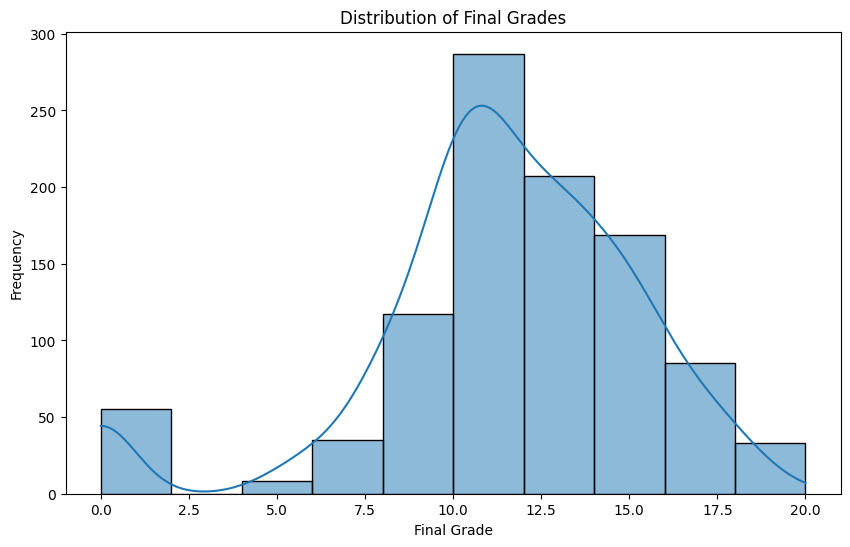

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='final_grade', bins=10, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

We see here that the median and mode is between 10-12.5 and there are more students achieving above the median than below. We see that there is over 100 students achieving grades above 15 and less than 50 who are close to getting a full 20. Thus students in this school are generally achieving above average grades, while there are a select few students who are achieving much lower grades compared to the mean and median. 

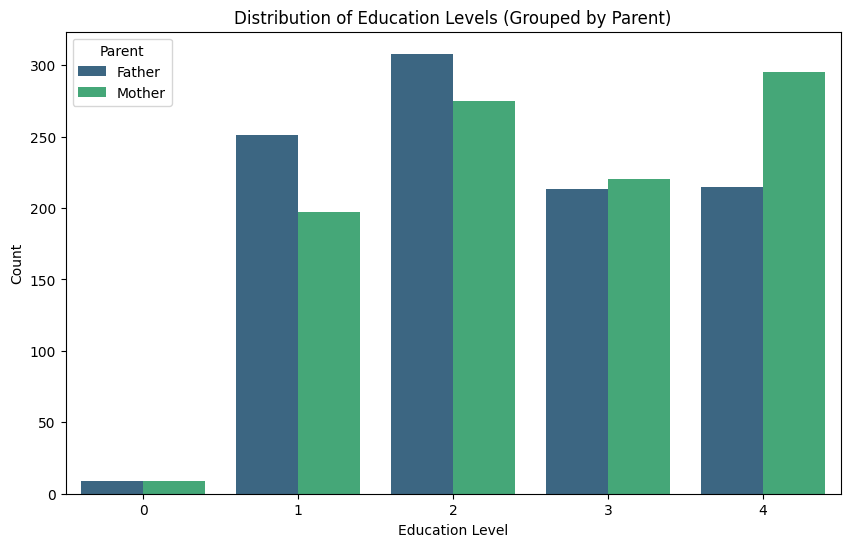

In [23]:
education_counts = (df_combined[['mother_education', 'father_education']].melt(var_name='Parent', value_name='Education Level').value_counts().reset_index(name='Count'))
education_counts['Parent'] = education_counts['Parent'].replace({'mother_education': 'Mother', 'father_education': 'Father'})
plt.figure(figsize=(10, 6))
sns.barplot(data=education_counts, x='Education Level', y='Count', hue='Parent', palette='viridis')
plt.title('Distribution of Education Levels (Grouped by Parent)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In this barplot, we see that for higher levels of education, as seen in levels 3 (high school) and 4 (higher education), that there are more mothers than fathers who studied up to these levels. On the other hand for lower levels at 1 (primary grade) and 2 (secondary grade), we see more fathers than mothers stop at this level, which supports how more mothers go for higher education. The low number of parents who have no education is also something we can investigate in later section, to see if it perhaps implies that parents with no education lead to their children also not being educated. Potential causes for more mothers going to higher education than fathers could be because of females valuing education more in Portuegese culture, males going straight to work after high school and other potential factors we cannot confirm yet. 


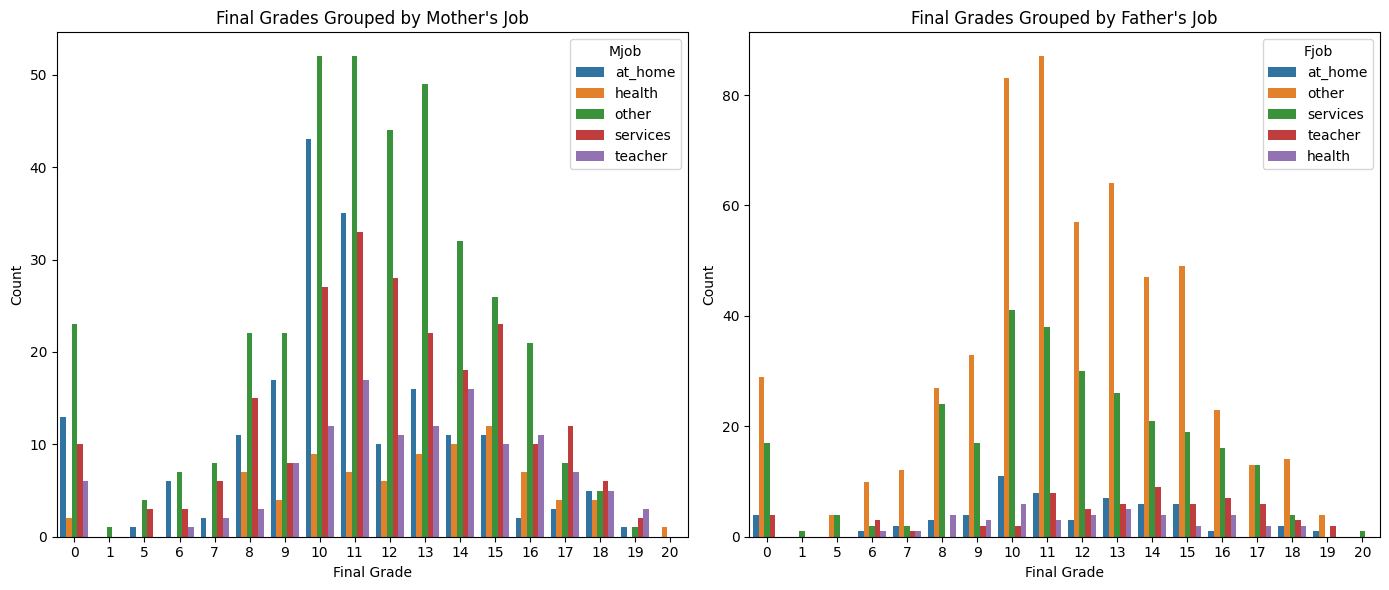

In [24]:
mother_job_counts = df_combined.groupby(['Mjob', 'final_grade']).size().reset_index(name='count')
father_job_counts = df_combined.groupby(['Fjob', 'final_grade']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=mother_job_counts, x='final_grade', y='count', hue='Mjob', palette='tab10')
plt.title('Final Grades Grouped by Mother\'s Job')
plt.xlabel('Final Grade')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(data=father_job_counts, x='final_grade', y='count', hue='Fjob', palette='tab10')
plt.title('Final Grades Grouped by Father\'s Job')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Here we wanted to see how the job of the parent can affect the child's final grades as jobs are typically linked to the education. In both plots, the job with the highest frequency in general is the 'other' group, which implies the diverse nature of jobs parents take on. At around the median grade of 10-12.5 we see that for both plots, mothers and fathers who work in other services are the most frequent, while for students who achieve higher grades above 15 we see that for mothers, there is no significant job that is most frequent in this range as sometimes its 'other' and other times it could be services or teacher. On the other hand, for fathers, we see that in that range of median to higher grades, the 'other' category still maintains the greatest frequency across all grades. This could simply imply that the jobs parents uptake does not necessarily imply that they are good at teaching their children, pass down good studious habits, or other factors leading to higher final grades. 

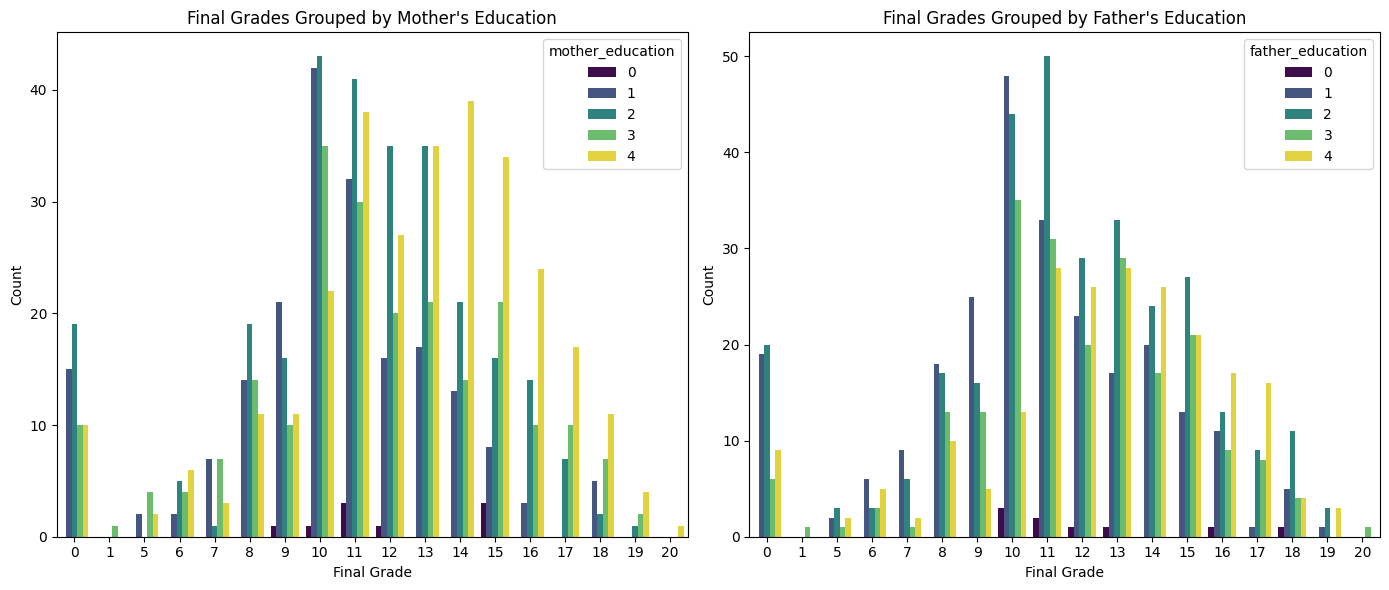

In [25]:
mother_education_counts = df_combined.groupby(['mother_education', 'final_grade']).size().reset_index(name='count')
father_education_counts = df_combined.groupby(['father_education', 'final_grade']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=mother_education_counts, x='final_grade', y='count', hue='mother_education', palette='viridis')
plt.title('Final Grades Grouped by Mother\'s Education')
plt.xlabel('Final Grade')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(data=father_education_counts, x='final_grade', y='count', hue='father_education', palette='viridis')
plt.title('Final Grades Grouped by Father\'s Education')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Here we take a more direct approach to our research question, to investigate directly the correlation between the education level of parents on the final grades of their child. In the mother's plot we see that students who are achieving higher grades than the median mostly consist of students who have mothers who have been through higher education. While for the father's plot we see that there is a significant number of students who achieve grade above the median and have fathers completing higher education, but we also see that those students closer to the median grade mostly have father at just level 2 education, which is secondary grade education. We could interpret this as mothers perhaps being more involved in a child's education, which coud explain why children with median or above final grades have mothers with higher levels of education especially at level 4. The more diverse distribution for father education could imply their lower involvement with their child's education potentially due to less time spent in general with their child due to working, or it could be that in this culture fathers are less likely to be a stay-at-home parent. 


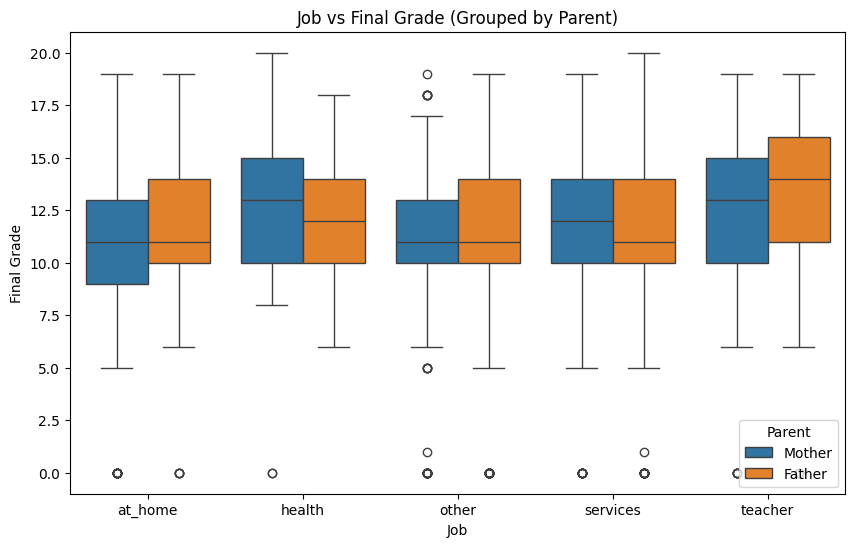

In [26]:
job_data = pd.concat([df_combined[['final_grade', 'Mjob']].rename(columns={'Mjob': 'Job'}).assign(Parent='Mother'),df_combined[['final_grade', 'Fjob']].rename(columns={'Fjob': 'Job'}).assign(Parent='Father')])
plt.figure(figsize=(10, 6))
sns.boxplot(data=job_data, x='Job', y='final_grade', hue='Parent', palette='tab10')
plt.title('Job vs Final Grade (Grouped by Parent)')
plt.xlabel('Job')
plt.ylabel('Final Grade')
plt.show()


The plots shows that parents who stay at home have students with the lowest median grades across the other job categories. For parents who stay home or work in other jobs, the median is roughly equal for both mothers and fathers, while for the other 3 categories, the median is higher for fathers who are teachers, while the median grade is higher for mothers in the other 2 categories. The job with the highest median for both genders is the teacher job, where fathers who work as teachers have students with the highest median across the the whole plot. These results could imply that having parents who are highly capable of teaching, will not only be able to teach their child, but also be more likely to teach their child compared to other jobs.  

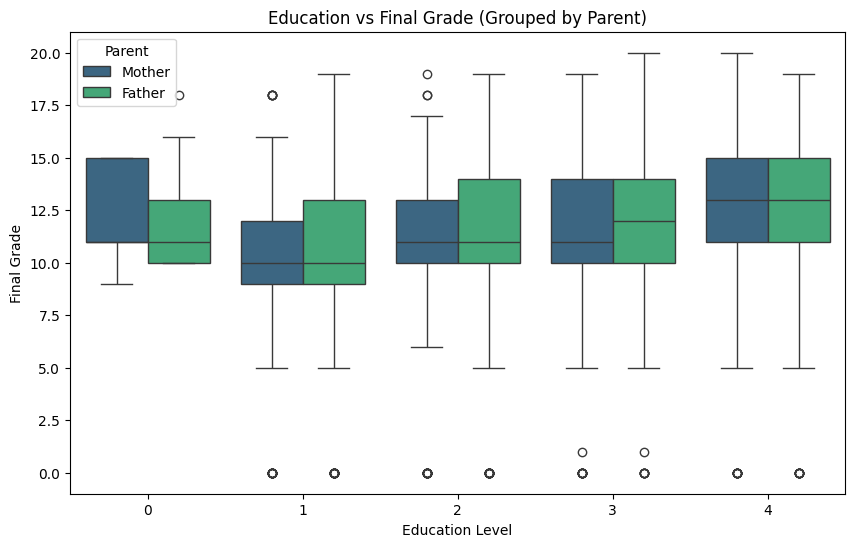

In [27]:
education_data = pd.concat([df_combined[['final_grade', 'mother_education']].rename(columns={'mother_education': 'Education'}).assign(Parent='Mother'),df_combined[['final_grade', 'father_education']].rename(columns={'father_education': 'Education'}).assign(Parent='Father')])
plt.figure(figsize=(10, 6))
sns.boxplot(data=education_data, x='Education', y='final_grade', hue='Parent', palette='viridis')
plt.title('Education vs Final Grade (Grouped by Parent)')
plt.xlabel('Education Level')
plt.ylabel('Final Grade')
plt.show()

In ths plot we see that students with parents who have higher levels of education tend to get higher grades as seen by an increase in median as we go from 1 to 4, with parents at level 4 eduaction having the highest median. The medians stay the same for both genders except in education level 3 where mothers have a lower median than fathers for thier child's final grade. The result for education level 0 is likely the way it is because there are not many students in this dataset who have no parents with no education. Overall this plot supports the results obtained from the grouped barplot as the median final grade is highest for more educated parents, which could also support the implications we discussed in that section.

The next few boxplots are for exploratory to see if there are other factors that may impact a student's grades, while still being related to parental factors
 

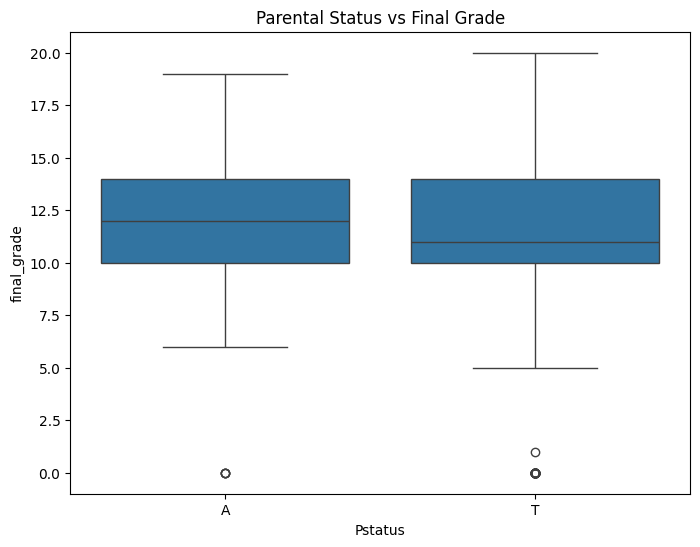

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='Pstatus', y='final_grade')
plt.title('Parental Status vs Final Grade')
plt.show()

Above shows that for parental status apart or together, the median final grade is less for those who parents who live together than if they lived apart. However, the interquartile range, q3, q1 are almost equal for both groups. 

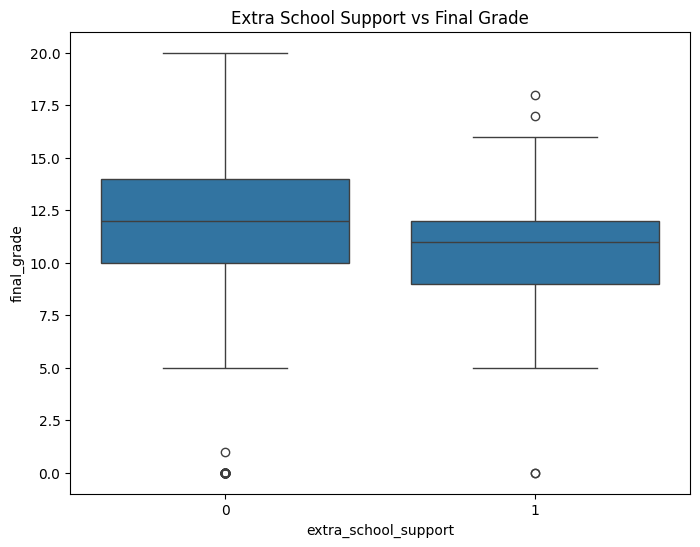

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='extra_school_support', y='final_grade')
plt.title('Extra School Support vs Final Grade')
plt.show()

The above boxplot demonstrates another interesting observation where the median for students get extra school support generally perform worse than those who do not have extra support. This could imply that only students who are struggling require this kind of support. The interquartile range for those with support is also smaller than those without it. 
 

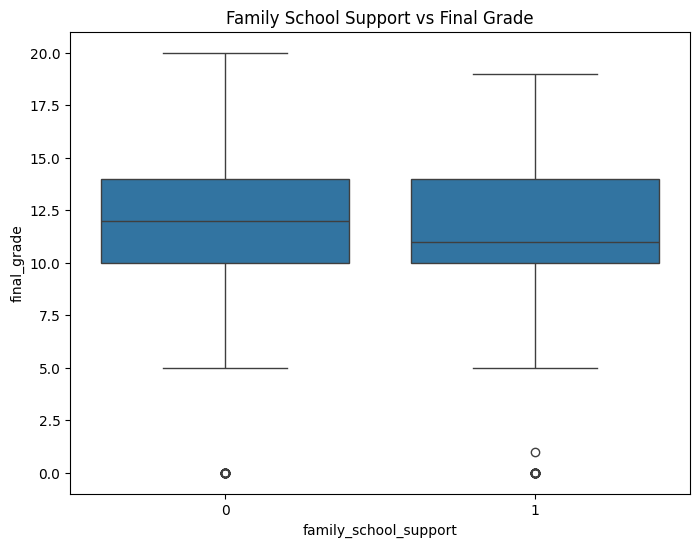

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='family_school_support', y='final_grade')
plt.title('Family School Support vs Final Grade')
plt.show()

This boxplot is similar to the Pstatus one, where the interquartile range, q1 and q3 are basically equal, but the median is lower for those with family school support. 

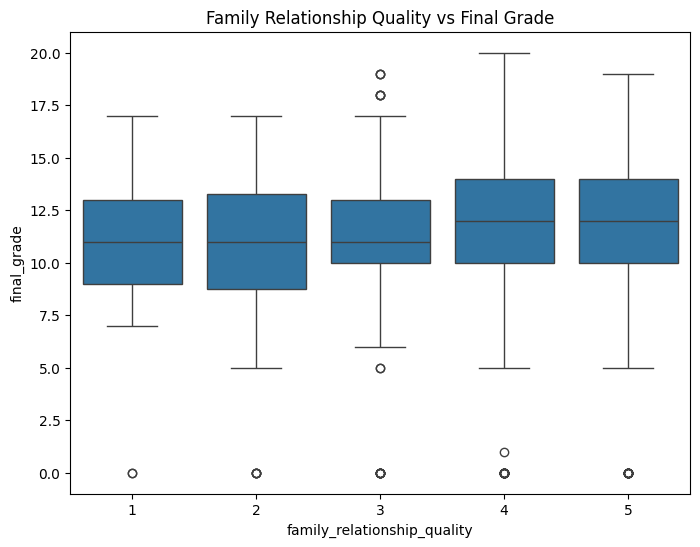

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='family_relationship_quality', y='final_grade')
plt.title('Family Relationship Quality vs Final Grade')
plt.show()

This boxplot shows an upward trend in the median final grade for students as the family relationship quality increases. However, there are notably a few outliers visible in this plot which could suggest that there are other signficant factors causing final grades to drop even when they have a very good family relationship quality at 5. 

# Ethics & Privacy

Due to our specific focus, we anticipate sampling bias in our analysis. Using our main dataset, the Portuguese test scores dataset as an example, this data comes from a specific region and thus may not generalize fully to other populations. We aim to observe correlations between variables and document any potential biases identified throughout our analysis process. Privacy breaches are minimized since the dataset is anonymized.

Ethical Concerns in Each Step of the Data Science Process

Question: Our question is well and clearly posed to investigate the relationships between parental education level and students’ math and language scores. Ethically, there is a risk of reinforcing socioeconomic stereotypes by attributing academic performance solely to parental background. To mitigate this,  we will ensure our analysis acknowledges individual student factors and clarify in our reporting that correlations do not imply causation. This is critical to prevent potential misuse of findings for biased assumptions about students’ abilities based on parental education.

Implications:  Besides the implications demonstrated by the relationship of our question with socioeconomic status, schools, policymakers, and educators could benefit from the insights of this research. Schools could offer supplemental programs or resources for students based on their family backgrounds, providing additional support to students who stand to benefit from being availed of academic opportunity. Policymakers could also use this information to intervene using policies that can bridge educational gaps based on family circumstances. However, schools could also maliciously use this information, leading to discrimination or lower expectations for students based on their parents' educational background rather than their individual capabilities.

Biases:  We recognize that our dataset focuses on students from Portugal, which may introduce bias in terms of regional socioeconomic and cultural factors. To actively detect bias, we’ll analyze the data for any patterns that may disproportionately reflect these demographics. Additionally, we’ll monitor for biases during analysis by comparing with any other datasets we may include and by running diagnostic checks to ensure fair representation across variables.

Informed Consent and Privacy: The dataset mentioned comes from a paper in 2008, whose data has been anonymized meaning that all the names and associations have been removed. Consequently, there are no risks in private data leakages from using this dataset, since there is no information to leak unless the school who provided this information were to publicize their database. We are mindful, however, that while our data is anonymous, the implications of our findings could still impact privacy indirectly if generalized improperly.

Transparency and Appeal: : We adopt a “clear-box” approach, making our data sources, methodology, and code available. This enables others to validate or replicate our findings, promoting accountability. Since the data is publicly accessible and anonymized, privacy is preserved without any risk of direct data leaks.

Continuous Monitoring: Throughout this project, we will continuously monitor our findings for any unintended biases or patterns that could impact equitable outcomes.  We will also clearly state any limitations of our data and analysis in the final report to guide responsible interpretation by stakeholders. While we cannot control how others use this information, these disclaimers aim to prevent misuse from occurring.

Note: The Portuguese dataset discussed in this section can be accessed here: https://www.kaggle.com/datasets/whenamancodes/student-performance/data?select=Portuguese.csv


# Team Expectations 

* Open and respectful communication amongst team members, communication will be taking place on the discord server created. The server should be checked daily with prompt responses to any of the tasks/issues addressed in the conversation. 
* Everyone is involved in every part of the project whether it be them completing their tasks or making decisions. 
* *Attend all our meetings, going to be done through discord server, and work to complete any work that needs to be done during these meetings in an effective and efficient manner*
* Be ready to adapt to any changes that may occur during the project whether it be a teammate slacking off, not meeting deadlines, etc.
* Put in your best effort for all of the work assigned.
* If there is something that is preventing you from completing your work, communication with the team is necessary in order to accommodate and help you.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/10  |  8 PM | Finalize wrangling(Imraan); Begin EDA (Wilson)  | Go over the work done, see if any suggestions/improvements are needed and discuss analysis strategy/approaches | 
| 11/17  |  8 PM |  Complete EDA and initiate analysis discussions (Yashas; Nathan) | Discuss Analysis strategies; Complete project check-in, Go over EDA and make suggestions/changes | 
| 11/24  | 8 PM  | Complete analysis; Draft results/conclusion/discussion (Jude) | Review project and suggest any changes/edits to project. Discuss how final video will be done|
| 12/01  | 8 PM  | Make group video; Finalize/proofread project conclusion and submit report and video (everyone) | Turn in Final Project & Group Project Surveys|